Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Samantha Yu"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Answer to Question 1:
To examine what categories of passengers were most likely to survive, we will perform the analysis as follows:
- Examine how the data set looks
- Check each attribute one by one and investigate it's impact on the data
- Fill the missing value
- Create categories and new attributes
- Visualize data after data cleaning

In [3]:
# Step 1: Examine how the data set looks
titanic_data = pd.read_csv('train.csv')
titanic_data.head() # Looking at first few rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Step 2: Check each attribute one by one and investigate it's impact on the data
titanic_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
# Step 3: Check attributes with missing values
for attribute in [titanic_data]:
    print (pd.isnull(attribute).sum() > 0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [6]:
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_sort = (round(percent, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_sort], axis=1, keys=['Missing Total', '%'])
missing_data.head()

,Missing Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [7]:
titanic_data.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kink, Mr. Vincenz",male,1601,G6,S
freq,1,577,7,4,644


The dataset consists of 12 attributes, where `Survival` is the target attribute. We can check each attribute one by one to investigate it's impact on survival rate.<br>
1. `PassengerId` is a nominal attribute and has no effect on the target attribute
2. `Survived` is target attribute
3. `Pclass` is a numeric attribute and it does not contain missing values

In [8]:
# 3.1. Impact of Pclass attribute on survival rate
print (titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


>We can see that passenger in first class (`Pclass` = 1) has the highest survival rate (62.96%)


4. `Sex` is a catergorical attributes having no missing values

In [9]:
# 4.1. Impact of Sex attribute on survival rate
print (titanic_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


> Females have better chance of surviving than males.

### Answer to Question 1:
Overall, females are more likely to survive the Titanic disaster. In addition to that, first-class passenger has the highest chances of surviving.

5. `SibSp` is a numerical attribute represents the number of siblings/spouse aboard the Titanic.
6. `Parch` is also numerical attribute represents the number of children/parents aboard the Titanic.

In [10]:
# 5.1. Impact of SibSp attribute on survival rate
print (titanic_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [11]:
# 6.1. Impact of Parch attribute on survival rate
print (titanic_data[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


> Based on the impact of `SibSp` and `Parch`, we can create a new attribute called `NotAlone` and check how having 
family memebers on this ship affects survival rate.

In [12]:
# 6.2. Impact of NotAlone attribute on survival rate
for dataset in [titanic_data]:
    # with no family members
    dataset['NotAlone'] = 0     
    # with family members
    dataset.loc[(dataset['SibSp'] + dataset['Parch'] + 1) > 1, 'NotAlone'] = 1
        
print (titanic_data[['NotAlone', 'Survived']].groupby(['NotAlone'], as_index = False).mean())    
    

   NotAlone  Survived
0         0  0.303538
1         1  0.505650


> We can see that passengers with family members on the ship have higher chance of surviving

7. `Embarked` has 2 missing values, we can fill them with the most common one.

In [13]:
# 7.1. Fill missing value with mode
titanic_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
for dataset in [titanic_data]:
    common_value = 'S'
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
# 7.2. Impact of Embarked attribute on survival rate
print (titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())    

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


> Most passengers who embarked at the Cherbourg port survived.

8. `Fare` is a numberic attribute and we can categorize `Fare` into 4 groups for analysis

In [15]:
# 8.1. Impact of Fare attribute on survival rate
titanic_data['FareGroup'] = pd.qcut(titanic_data['Fare'], 4)
print (titanic_data[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index = False).mean())

         FareGroup  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


> Passengers who paid a higher fare (i.e. first class) were more likely to survive.

9. `Age` is a numeric attribute with missing values. To fill the missing values, we can create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation.

In [16]:
# 9.1. Filling missing values
for dataset in [titanic_data]:
    mean = titanic_data['Age'].mean()
    std = titanic_data['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    filled_age = dataset['Age'].copy()
    filled_age[np.isnan(filled_age)] = rand_age
    dataset['Age'] = filled_age
    dataset['Age'] = titanic_data['Age'].astype(int)

In [17]:
# 9.2. Modify Age into Age Groups
def age_group(age):
    if age < 15:
        return '0 - 14 (Children)'
    if age < 25:
        return '15 - 24 (Youth)'
    if age < 65:
        return '25 - 64 (Adults)'
    elif not math.isnan(age):
        return '65+ (Seniors)'

titanic_data['AgeGroup'] = titanic_data['Age'].apply(age_group)   
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NotAlone,FareGroup,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",15 - 24 (Youth)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,"(31.0, 512.329]",25 - 64 (Adults)
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(7.91, 14.454]",25 - 64 (Adults)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,"(31.0, 512.329]",25 - 64 (Adults)
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,"(7.91, 14.454]",25 - 64 (Adults)


In [18]:
# 9.3. Impact of AgeGroup attribute on survival rate
print (titanic_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index = False).mean())

            AgeGroup  Survived
0  0 - 14 (Children)  0.576923
1    15 - 24 (Youth)  0.329588
2   25 - 64 (Adults)  0.388785
3      65+ (Seniors)  0.090909


10. `Name` is unique but it has `Title` which can have impact on target attribute

In [19]:
# 10.1. Creating a new attribute Title from Name
for dataset in [titanic_data]:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [20]:
# 10.2. Impact of Title attribute on survival rate
print (titanic_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


11. `Cabin` has many missing values but we can create a new attribute `Deck` by extracting the letter from cabin number as it refers to the deck of the titanic, ranging from A to G.

In [21]:
# 11.1 Converting cabin number into Deck
for dataset in [titanic_data]:
    # fill empty Cabin with 'Unknown'
    dataset['Cabin'] = dataset['Cabin'].fillna('Unknown')
    dataset['Deck'] = dataset.Cabin.str.extract('([a-zA-Z]+)', expand=False)

In [22]:
# 11.2. Impact of Deck attribute on survival rate
print (titanic_data[['Deck', 'Survived']].groupby(['Deck'], as_index = False).mean())

      Deck  Survived
0        A  0.466667
1        B  0.744681
2        C  0.593220
3        D  0.757576
4        E  0.750000
5        F  0.615385
6        G  0.500000
7        T  0.000000
8  Unknown  0.299854


12. `Ticket` attribute has 681 unique tickets, and cannot be mapped into useful categories.

### Answer to Question 3:
As shown above, five new attributes are created. `NotAlone` is a categorical attribute, which equals 0 if the passenger is alone (i.e. adding `SibSp` and `Parch` equals 0), and is 1 otherwise. `AgeGroup` and `FareGroup` are categorized into four groups from the attributes `Age` and `Fare` respectively. While `Title` and `Deck` are extracted from `Name` and `Cabin` respectively.


From the analysis, we can exclude the following three attributes:

- `PassengerId` will not affect the survival rate if we reassign ids
- `Ticket` has too many unique values (681 unique values out of 891)
- `Cabin` is highly incomplete (77% of it are missing)

### Answer to Question 4:
Two attributes with missing values, that are included in the analysis, are `Age` and `Embarked`. For handling missing `Age` values, We used random numbers, which are computed based on the mean age value and standard deviation. The missing `Embarked` values are replaced with the most occured value since `Embarked` is a categorical attribute. Both methods aim to diminish any correlations involving the attributes that are imputed.

In [23]:
# Step 4: Create new dataset without unwanted columns
new_titanic_data = titanic_data.drop(labels=['PassengerId', 'Ticket', 'Cabin'], axis=1) 
new_titanic_data.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NotAlone,FareGroup,AgeGroup,Title,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1,"(-0.001, 7.91]",15 - 24 (Youth),Mr,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1,"(31.0, 512.329]",25 - 64 (Adults),Mrs,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0,"(7.91, 14.454]",25 - 64 (Adults),Miss,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1,"(31.0, 512.329]",25 - 64 (Adults),Mrs,C
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,0,"(7.91, 14.454]",25 - 64 (Adults),Mr,Unknown


In [24]:
new_titanic_data.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null object
NotAlone     891 non-null int64
FareGroup    891 non-null category
AgeGroup     891 non-null object
Title        891 non-null object
Deck         891 non-null object
dtypes: category(1), float64(1), int32(1), int64(5), object(6)
memory usage: 88.0+ KB


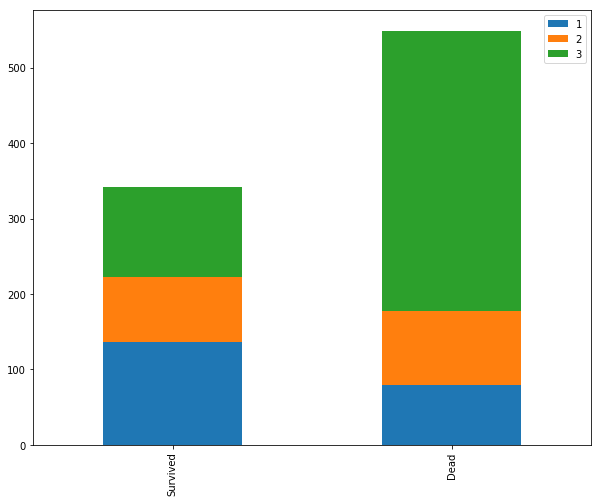

In [25]:
# Step 5: Visualize data after data cleaning

# Graph 1: The relation between which class a passenger is in and how it affected their chance of survival.
pclass_survived = new_titanic_data[new_titanic_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = new_titanic_data[new_titanic_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived, pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

We can clearly see that the passengers from first and second class had higher survival rate than those from third class.

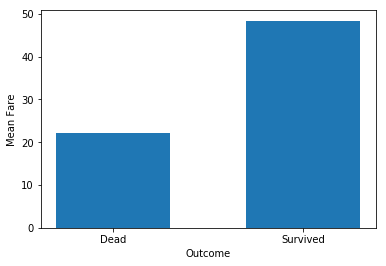

In [26]:
# Graph2: The relation between ticket fare a passenger paid and how it affected their chance of survival.
dead = new_titanic_data[new_titanic_data['Survived'] == 0]['Fare'].mean()
survived = new_titanic_data[new_titanic_data['Survived'] == 1]['Fare'].mean()
xs  = [dead, survived]
ys = ['Dead','Survived']
plt.bar(ys, xs, 0.6, align='center')
plt.xlabel('Outcome')
plt.ylabel('Mean Fare')
plt.show()

We can observe that higher fare paying passengers have better chance of survival.

### Answer to Question 2:
The following attributes are used for the analysis as we have discussed above.

In [27]:
new_titanic_data.columns.values # 14 attributes

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'NotAlone', 'FareGroup', 'AgeGroup', 'Title',
       'Deck'], dtype=object)